# Проект "Авиарейсы без потерь"

Цель проекта - отобрать среди рейсов за зимнее время 2017 года с вылетом из Анапы самые малоприбыльные, от которых можно отказаться.
С помощью SQL уже сформирован csv-документ с необходимыми для анализа данными по этим рейсам.
Дальнейший анализ - в данном ноутбуке.

In [77]:
# библиоткеи для анализа данных
import pandas as pd
import numpy as np

# библиотека для работы с датами
from datetime import datetime

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [78]:
# Подгружаем сформированный с помощью SQL датасет
data = pd.read_csv('data_Anapa_SQL.csv')

In [79]:
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              127 non-null    int64  
 1   arrival_city           127 non-null    object 
 2   date_departure_planed  127 non-null    object 
 3   sold_tickets           127 non-null    int64  
 4   money_sold_tickets     118 non-null    float64
 5   day_of_week            127 non-null    float64
 6   flight_minutes_fact    127 non-null    float64
 7   departure_delay        127 non-null    float64
 8   aircraft_model         127 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 9.1+ KB


,flight_id,arrival_city,date_departure_planed,sold_tickets,money_sold_tickets,day_of_week,flight_minutes_fact,departure_delay,aircraft_model
85,136666,Belgorod,2017-02-09,87,664500.0,4.0,50.0,1.0,Sukhoi Superjet-100
8,136819,Belgorod,2017-01-04,96,759000.0,3.0,50.0,4.0,Sukhoi Superjet-100
111,136612,Belgorod,2017-02-21,94,746400.0,2.0,50.0,2.0,Sukhoi Superjet-100
61,136729,Belgorod,2017-01-29,88,695400.0,7.0,50.0,4.0,Sukhoi Superjet-100
63,136642,Belgorod,2017-01-30,64,531000.0,1.0,49.0,3.0,Sukhoi Superjet-100


In [80]:
# Приводим столбец date_departure_planed к типу datetime 
data.date_departure_planed = pd.to_datetime(data.date_departure_planed)
for i in range(len(data.date_departure_planed)): 
    data.date_departure_planed[i] = f'{data.date_departure_planed[i].day} - 0{data.date_departure_planed[i].month}'

<ipython-input-80-faf89e3b3bc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.date_departure_planed[i] = f'{data.date_departure_planed[i].day} - 0{data.date_departure_planed[i].month}'


Важный момент: среди данных не представлены вылеты из Анапы в декабре в 2017, а только за январь-февраль 2017. Поэтому будем рассматривать зимнее время как январь-февраль

In [81]:
data.query('sold_tickets == 0 or arrival_city == "Novokuznetsk"')

,flight_id,arrival_city,date_departure_planed,sold_tickets,money_sold_tickets,day_of_week,flight_minutes_fact,departure_delay,aircraft_model
5,136546,Novokuznetsk,3 - 01,0,NaN,2.0,302.0,3.0,Boeing 737-300
20,136523,Novokuznetsk,10 - 01,0,NaN,2.0,312.0,4.0,Boeing 737-300
35,136540,Novokuznetsk,17 - 01,0,NaN,2.0,307.0,4.0,Boeing 737-300
50,136560,Novokuznetsk,24 - 01,0,NaN,2.0,305.0,3.0,Boeing 737-300
65,136544,Novokuznetsk,31 - 01,0,NaN,2.0,304.0,0.0,Boeing 737-300
80,136514,Novokuznetsk,7 - 02,0,NaN,2.0,299.0,4.0,Boeing 737-300
95,136567,Novokuznetsk,14 - 02,0,NaN,2.0,311.0,2.0,Boeing 737-300
110,136511,Novokuznetsk,21 - 02,0,NaN,2.0,310.0,5.0,Boeing 737-300
125,136513,Novokuznetsk,28 - 02,0,NaN,2.0,310.0,3.0,Boeing 737-300


Видно, что имеются пропуски или нулевые значения sold_tickets, money_sold_tickets. 
Покажем, что такая ситуация имеется во всех вылетах в Новокузнецк:

Промежуточный итог - вылеты в Новокузнецк не имет данных о количестве проданных билетов и о вырученных средствах с продажи билетов. Поэтому дальнейший анализ проводим без этих вылетов (9 штук).

In [82]:
# Убираем из датасета вылеты в Новокузнецк
data.drop([5,20,35,50,65,80,95,110,125], inplace = True)
data

,flight_id,arrival_city,date_departure_planed,sold_tickets,money_sold_tickets,day_of_week,flight_minutes_fact,departure_delay,aircraft_model
0,136420,Moscow,1 - 01,104,1542000.0,7.0,98.0,4.0,Boeing 737-300
1,136661,Belgorod,1 - 01,96,759000.0,7.0,50.0,2.0,Sukhoi Superjet-100
2,136458,Moscow,2 - 01,110,1568800.0,1.0,99.0,2.0,Boeing 737-300
3,136936,Belgorod,2 - 01,82,632400.0,1.0,50.0,3.0,Sukhoi Superjet-100
4,136119,Moscow,3 - 01,113,1653000.0,2.0,101.0,3.0,Boeing 737-300
...,...,...,...,...,...,...,...,...,...
121,136802,Belgorod,26 - 02,96,746400.0,7.0,50.0,7.0,Sukhoi Superjet-100
122,136266,Moscow,27 - 02,108,1566400.0,1.0,100.0,3.0,Boeing 737-300
123,136953,Belgorod,27 - 02,97,765300.0,1.0,50.0,2.0,Sukhoi Superjet-100
124,136215,Moscow,28 - 02,114,1664000.0,2.0,100.0,4.0,Boeing 737-300


In [83]:
# Проверяем информацию по новому датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              118 non-null    int64  
 1   arrival_city           118 non-null    object 
 2   date_departure_planed  118 non-null    object 
 3   sold_tickets           118 non-null    int64  
 4   money_sold_tickets     118 non-null    float64
 5   day_of_week            118 non-null    float64
 6   flight_minutes_fact    118 non-null    float64
 7   departure_delay        118 non-null    float64
 8   aircraft_model         118 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 9.2+ KB


In [84]:
# В результате будем проводить анализ по 59 вылетам в Москву и 59 в Белгород
data.arrival_city.value_counts()

Belgorod    59
Moscow      59
Name: arrival_city, dtype: int64

In [85]:
# Значения в стоблцах № 4, 5, 6, 7 - целочисленные. Приведем их к этому виду
data.money_sold_tickets = data.money_sold_tickets.astype(int)
data.day_of_week = data.day_of_week.astype(int)
data.flight_minutes_fact = data.flight_minutes_fact.astype(int)
data.departure_delay = data.departure_delay.astype(int)

In [86]:
# Модели самолетов в датасете
data.aircraft_model.value_counts()

Boeing 737-300         59
Sukhoi Superjet-100    59
Name: aircraft_model, dtype: int64

Всего в датасете представлено 2 модели самолетов. Ниже будут представлены дополнительные характеристики данных моделей самолетов. Эти данные помогут оценить рентабельность рейсов.

In [87]:
aircrafts = pd.DataFrame()
aircrafts['aircraft_model'] = ['Boeing 737-300','Sukhoi Superjet-100']  # модели
aircrafts['seats'] = [130,97]  # количество мест в самолетах
aircrafts['fuel_minute'] = [2400/60,1700/60]  # расход топлива кг/мин.
aircrafts['price_fuel_mean'] = [40.494,40.494]  # средняя стоимость топлива в Анапе в январе-феврале 2017 за 1 кг.
aircrafts

,aircraft_model,seats,fuel_minute,price_fuel_mean
0,Boeing 737-300,130,40.000000,40.494
1,Sukhoi Superjet-100,97,28.333333,40.494


Теперь соединим датафреймы

In [88]:
data = data.merge(aircrafts, on = 'aircraft_model', how = 'left')

In [89]:
data['seats_otnosit'] = data['sold_tickets'] / data['seats']  # заполненность рейса
data['fuel_cost'] = data['flight_minutes_fact'] * data['fuel_minute'] * data['price_fuel_mean']  # стоимость топлива за рейс
data['profit'] = data['money_sold_tickets'] - data['fuel_cost']  # прибыль как разница стоимости билетов и затратами за топливо

## Анализ вылетов из Анапы в зимний период 2017 года

/Users/sunshine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sunshine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


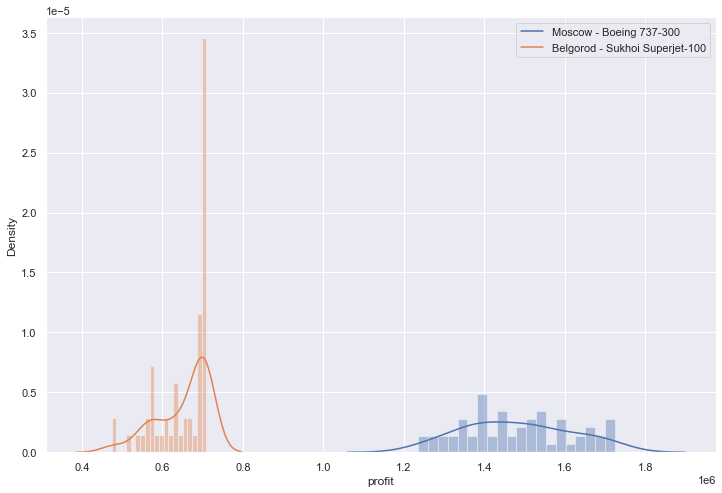

In [107]:
# Построим на одном графике гистограмму распределния прибыли по рейсам в Москву и Белгород
plt.rcParams["figure.figsize"] = (12, 8)
sns.distplot(data["profit"][data["arrival_city"] == 'Moscow'], bins = 20)
sns.distplot(data["profit"][data["arrival_city"] == 'Belgorod'], bins = 20)
plt.legend(['Moscow - Boeing 737-300', 'Belgorod - Sukhoi Superjet-100'])
plt.show()

Поскольку из Анапы в Белгород летает только одна модель самолета, то она ограничена по своему количеству мест, а следовательно, и по прибыли. Поскольку билеты в Москву стоят дороже, и в модели самолета, который летает в Москву мест больше (130 против 97) - то и значения прибыли - выше.

## Анализ вылетов из Анапы в Москву

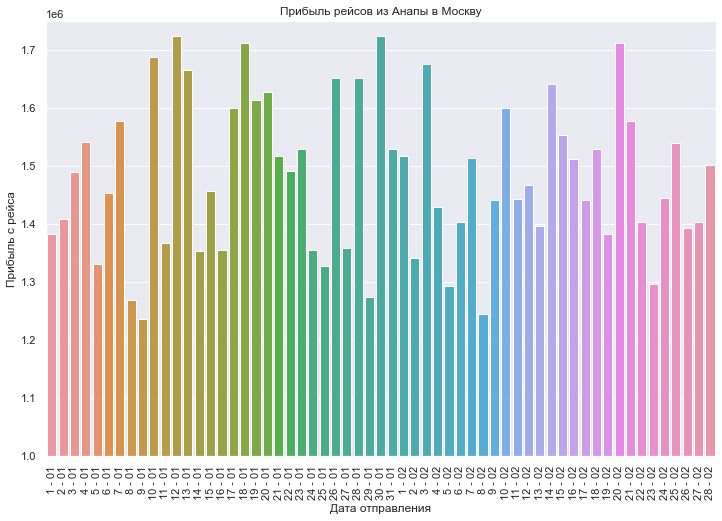

In [108]:
# Прибыль по всем рейсам из Анапы в Москву 
sns.barplot(x = 'date_departure_planed', y = 'profit', data = data.query('arrival_city == "Moscow"'))
plt.title('Прибыль рейсов из Анапы в Москву')
plt.ylim(1000000, 1750000)
plt.xlabel('Дата отправления')
plt.ylabel('Прибыль с рейса')
plt.xticks(rotation=90)
plt.show()

In [92]:
# Средняя прибыль рейсов из Анапы в Москву
data.query('arrival_city == "Moscow"').profit.mean()

1480874.806779661

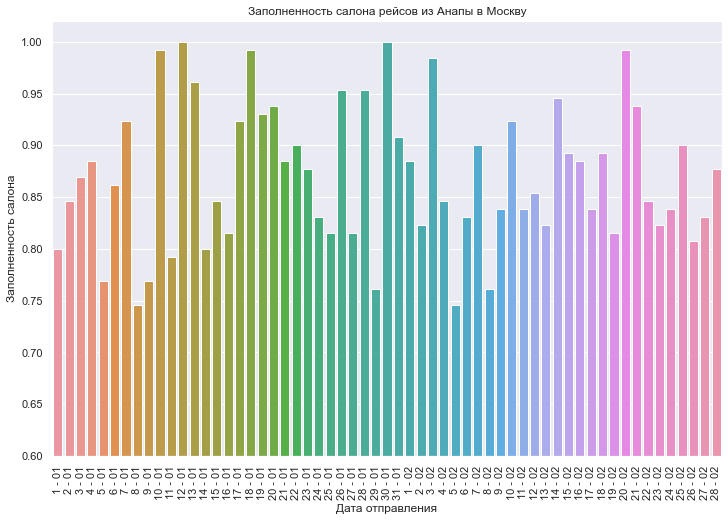

In [93]:
# Заполненность салона по всем рейсам из Анапы в Москву 
sns.barplot(x = 'date_departure_planed', y = 'seats_otnosit', data = data.query('arrival_city == "Moscow"'))
plt.title('Заполненность салона рейсов из Анапы в Москву')
plt.ylim(0.6, 1.02)
plt.xlabel('Дата отправления')
plt.ylabel('Заполненность салона')
plt.xticks(rotation=90)
plt.show()

In [94]:
# Средняя заполненность салона рейсов из Анапы в Москву
data.query('arrival_city == "Moscow"').seats_otnosit.mean()

0.8701434159061276

Выведем 5 рейсов в Москву с минимальной прибылью и 6 рейсов с минимальной заполненностью салона:

In [95]:
# 5 рейсов из Анапы в Москву с минимальной прибылью
data.query('arrival_city == "Moscow"').profit.sort_values(ascending = True).head(5)

16    1236024.00
76    1244204.24
14    1269024.00
56    1274243.76
70    1293424.00
Name: profit, dtype: float64

In [96]:
# 6 рейсов из Анапы в Москву с минимальной заполненностью салона
data.query('arrival_city == "Moscow"').seats_otnosit.sort_values(ascending = True).head(6)

70    0.746154
14    0.746154
56    0.761538
76    0.761538
8     0.769231
16    0.769231
Name: seats_otnosit, dtype: float64

Выводя рейсы с минимальной заполняенностью, данные 5 рейсов входят в топ-6 худших по заполненности. Поскольку фактор прибыльности рейса более важен, чпем заполненность (кроме того, существует прямая зависимость этих факторов), далее будем рассматривать только прибыльность рейсов.

In [97]:
# 5 рейсов из Анапы в Москву с минимальной прибылью
indexes = data.query('arrival_city == "Moscow"').profit.sort_values(ascending = True).head(5).index
data.iloc[indexes].sort_values('profit')

,flight_id,arrival_city,date_departure_planed,sold_tickets,money_sold_tickets,day_of_week,flight_minutes_fact,departure_delay,aircraft_model,seats,fuel_minute,price_fuel_mean,seats_otnosit,fuel_cost,profit
16,136464,Moscow,9 - 01,100,1398000,1,100,2,Boeing 737-300,130,40.0,40.494,0.769231,161976.00,1236024.00
76,136250,Moscow,8 - 02,99,1407800,3,101,1,Boeing 737-300,130,40.0,40.494,0.761538,163595.76,1244204.24
14,136122,Moscow,8 - 01,97,1431000,7,100,3,Boeing 737-300,130,40.0,40.494,0.746154,161976.00,1269024.00
56,136178,Moscow,29 - 01,99,1434600,7,99,5,Boeing 737-300,130,40.0,40.494,0.761538,160356.24,1274243.76
70,136360,Moscow,5 - 02,97,1455400,7,100,3,Boeing 737-300,130,40.0,40.494,0.746154,161976.00,1293424.00


Все 5 рейсов - имеют примерно одинаковую заполненность салона (от 97 до 100 билетов продано). 

Однако, исходя из общей картины по рейсам в Москву предлагаю убрать 4 рейса, а именно:
1) Рейс № 136122 - вылет 8 января (воскресенье);
2) Рейс № 136250 - вылет 8 февраля (среда);
3) Рейс № 136178 - вылет 29 января (воскресенье);
4) Рейс № 136360 - вылет 5 февраля (воскресенье);

Касаемо рейса № 136464 (9 января понедельник) - его предлагаю оставить, поскольку из-за того, что у берем рейс № 136122 - пассажиры купят билеты на соседние даты, а с учетом того, что это новогодние праздники - будут стараться улететь как можно позже. Поэтому, выбирая из примерно одинаковых по прибыльности рейсов 8 и 9 января предлагается убрать именно ерйс 8 января, а рейс 9 января оставить.

Интересный тренд - среди 5 минимальных по прибыльности рейсов, 3 рейса - с вылетом в воскресенье. Проверим среднюю прибыльность по дням недели:

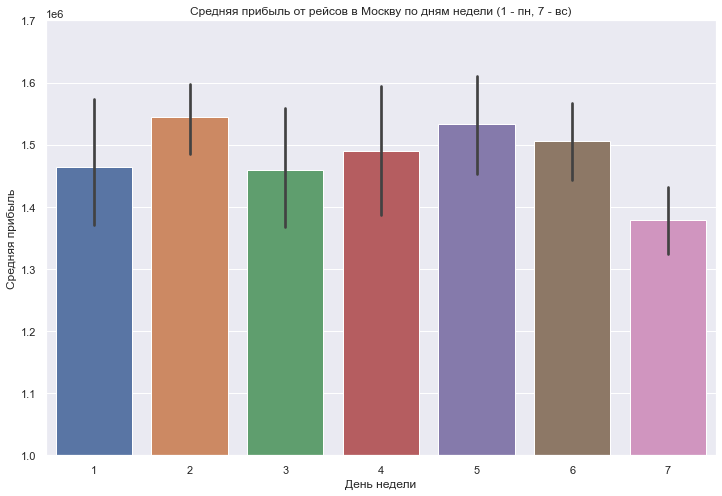

In [98]:
sns.barplot(x = 'day_of_week', y = 'profit', data = data.query('arrival_city == "Moscow"'));
plt.title('Средняя прибыль от рейсов в Москву по дням недели (1 - пн, 7 - вс)')
plt.ylim(1000000, 1700000)
plt.xlabel('День недели')
plt.ylabel('Средняя прибыль')
plt.show()

Вывод: средняя прибыль по воскресеньям ниже, чем в остальные дни. Тот факт, что убираем 4 рейса, среди которых 3 рейса - с вылетом в воскресенье подтверждает правильность наших выводов.

## Перейдем к анализу рейсов из Анапы в Белгород, аналогично вылетам в Москву

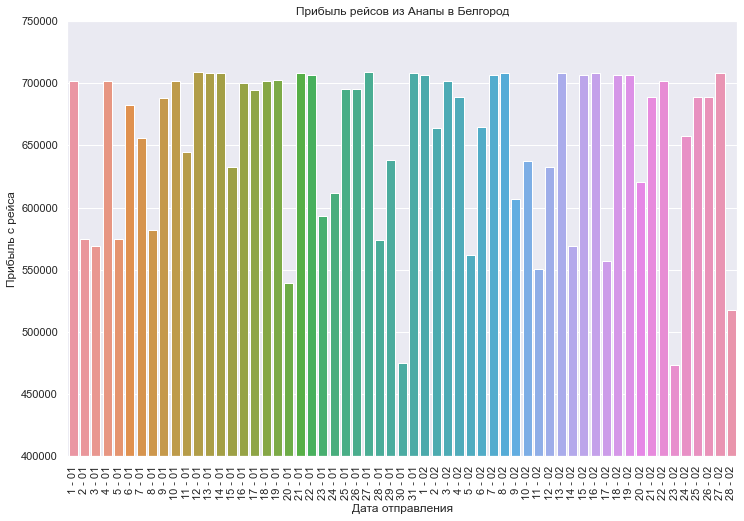

In [99]:
# Прибыль по всем рейсам из Анапы в Белгород
plt.rcParams["figure.figsize"] = (12, 8)
sns.barplot(x = 'date_departure_planed', y = 'profit', data = data.query('arrival_city == "Belgorod"'))
plt.title('Прибыль рейсов из Анапы в Белгород')
plt.ylim(400000, 750000)
plt.xlabel('Дата отправления')
plt.ylabel('Прибыль с рейса')
plt.xticks(rotation=90)
plt.show()

In [100]:
# Средняя прибыль рейсов из Анапы в Белгород
data.query('arrival_city == "Belgorod"').profit.mean()

652971.8618644068

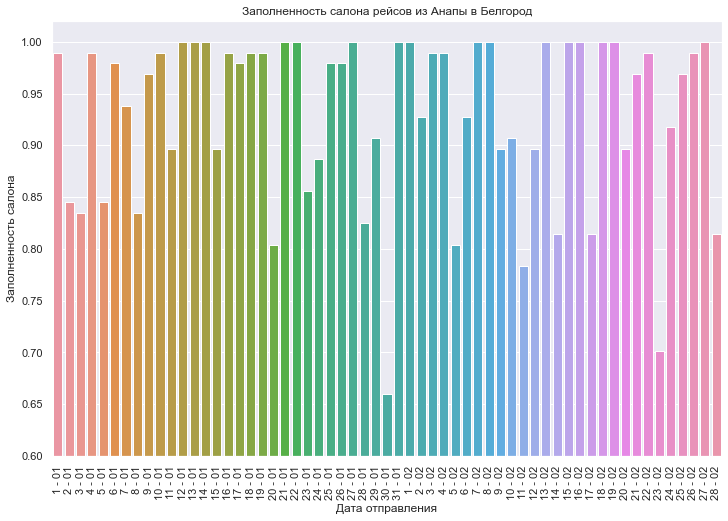

In [101]:
# Заполненность салона по всем рейсам из Анапы в Белгород
plt.rcParams["figure.figsize"] = (12, 8)
sns.barplot(x = 'date_departure_planed', y = 'seats_otnosit', data = data.query('arrival_city == "Belgorod"'))
plt.title('Заполненность салона рейсов из Анапы в Белгород')
plt.ylim(0.6, 1.02)
plt.xlabel('Дата отправления')
plt.ylabel('Заполненность салона')
plt.xticks(rotation=90)
plt.show()

In [102]:
# Средняя заполненность салонов рейсов из Анапы в Белгород
data.query('arrival_city == "Belgorod"').seats_otnosit.mean()

0.9297571203914029

Выведем 5 рейсов в Белгород с минимальной прибылью и 6 рейсов с минимальной заполненностью салона:

In [103]:
# 5 рейсов из Анапы в Белгород с минимальной прибылью
data.query('arrival_city == "Belgorod"').profit.sort_values(ascending = True).head(5)

107    473633.50
59     474780.83
117    517733.50
39     538980.83
83     550433.50
Name: profit, dtype: float64

In [104]:
# 6 рейсов из Анапы в Белгород с минимальной заполненностью салона
data.query('arrival_city == "Belgorod"').seats_otnosit.sort_values(ascending = True).head(8)

59     0.659794
107    0.701031
83     0.783505
71     0.804124
39     0.804124
95     0.814433
89     0.814433
117    0.814433
Name: seats_otnosit, dtype: float64

Выводя рейсы с минимальной заполняенностью, данные 5 рейсов входят в топ-8 худших по заполненности. Поскольку фактор прибыльности рейса более важен, чпем заполненность (кроме того, существует прямая зависимость этих факторов), далее будем рассматривать только прибыльность рейсов.

In [105]:
# 5 рейсов из Анапы в Белгород с минимальной прибылью
indexes = data.query('arrival_city == "Belgorod"').profit.sort_values(ascending = True).head(5).index
data.iloc[indexes].sort_values('profit')

,flight_id,arrival_city,date_departure_planed,sold_tickets,money_sold_tickets,day_of_week,flight_minutes_fact,departure_delay,aircraft_model,seats,fuel_minute,price_fuel_mean,seats_otnosit,fuel_cost,profit
107,136807,Belgorod,23 - 02,68,531000,4,50,3,Sukhoi Superjet-100,97,28.333333,40.494,0.701031,57366.50,473633.50
59,136642,Belgorod,30 - 01,64,531000,1,49,3,Sukhoi Superjet-100,97,28.333333,40.494,0.659794,56219.17,474780.83
117,136844,Belgorod,28 - 02,79,575100,2,50,1,Sukhoi Superjet-100,97,28.333333,40.494,0.814433,57366.50,517733.50
39,136887,Belgorod,20 - 01,78,595200,5,49,5,Sukhoi Superjet-100,97,28.333333,40.494,0.804124,56219.17,538980.83
83,136922,Belgorod,11 - 02,76,607800,6,50,2,Sukhoi Superjet-100,97,28.333333,40.494,0.783505,57366.50,550433.50


Все 5 рейсов - имеют невысокую заполненность салона (от 64 до 79 билетов продано из 97 мест суммарно). 

Однако, исходя из общей картины по рейсам в Белгород предлагаю убрать 4 рейса, которые наиболее сильно выбиваются по низкому значению прибыли:
1) Рейс № 136807 - вылет 23 февраля (четверг);
2) Рейс № 136642 - вылет 30 января (понедельник);
3) Рейс № 136844 - вылет 28 февраля (вторник);
4) Рейс № 136887 - вылет 20 января (пятница);

Именно эти 4 рейса крайне выделяются среди остальных (можно увидеть по графику прибыли по рейсам).

Интересно посмотреть на ситуацию с вылетами в Белгоролд по средней прибыли по дням недели:

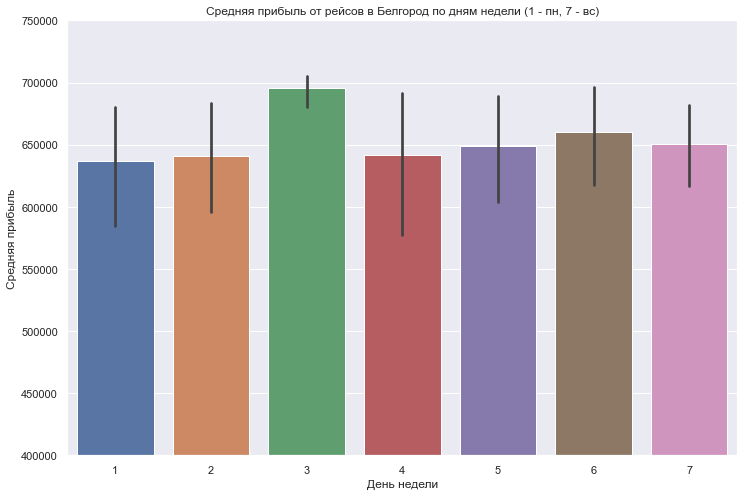

In [106]:
sns.barplot(x = 'day_of_week', y = 'profit', data = data.query('arrival_city == "Belgorod"'));
plt.title('Средняя прибыль от рейсов в Белгород по дням недели (1 - пн, 7 - вс)')
plt.ylim(400000, 750000)
plt.xlabel('День недели')
plt.ylabel('Средняя прибыль')
plt.show()

Вывод: средняя прибыль по понедельникам ниже всего. Здесь видно, что по средам самая высокая средняя прибыль, и разброс в этот день самый маленький. Можно с уверенностью сказать, что в среду выгоднее всего запускать рейсы из анапы в Белгород.

# Выводы по проекту:

1. В датасете имеется 127 строк, среди которых 9 - вылеты в Новокузнецк, данные о продажах билетов и их стоимости отсутствуют. Поэтому дальнейший анализ проводился по 118 строкам - вылеты из Анапы в Моску (59 шт) и в Белгород (59 шт).


2. В датасете отсутствуют данные по декабрю 2017 года. Это связано с отстутствием этих значений в Базе данных.


3. Представлено всего 2 модели самолетов, которые совершали вылеты: в Москву - Boeing 737-300; в Белгород - Sukhoi Superjet-100. Данные по расходу топлива, количеству мест и стоимости топлива в январе-феврале 2017 года добавлены к существующему датасету.


4. Средняя прибыль рейсов из Анапы в Москву - 1.480.874 руб.; в Белгород - 652.971 руб.


5. Средняя заполненность салона рейсов из Анапы в Москву - 0,87; в Белгород - 0,93.


6. Предложено убрать 4 рейса в Москву (каждый из этих рейсов - имеет показатели прибыли и заполненности ниже, чем средние по рейсам): 
    1) Рейс № 136122 - вылет 8 января (воскресенье);
    2) Рейс № 136250 - вылет 8 февраля (среда);
    3) Рейс № 136178 - вылет 29 января (воскресенье);
    4) Рейс № 136360 - вылет 5 февраля (воскресенье).
    
    
7. Предложено убрать 4 рейса в Белгород (каждый из этих рейсов - имеет показатели прибыли и заполненности ниже, чем средние по рейсам): 
    1) Рейс № 136807 - вылет 23 февраля (четверг); 
    2) Рейс № 136642 - вылет 30 января (понедельник);
    3) Рейс № 136844 - вылет 28 февраля (вторник);
    4) Рейс № 136887 - вылет 20 января (пятница).
    
    
8. Среди рейсов в Москву видно, что в воскресенье - самые низкие показатели по прибыли. Среди 4 рейсов, которые предложены к сокращению - 3 с вылетами в воскресенье.